# Template Matching - OpenCV

In [1]:
!pip install opencv-python
!pip install matplotlib

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Load our images
<ul><li>Our main image from our camera feed game whatever</li><li>
    Image we are searching for inside the main image</li></ul>

In [3]:
eyes_img = cv2.imread('eyes.png', cv2.IMREAD_UNCHANGED)
pupil_img = cv2.imread('pupil.png', cv2.IMREAD_UNCHANGED)

In [4]:
pwd

'G:\\Projects\\speech aligner\\kamal speech aliner\\speach_aliner\\clean\\practice_code\\searching_imge_in_image'

### Show our Main Image

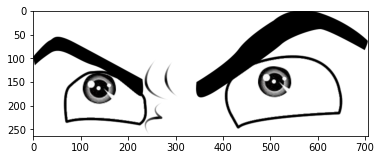

In [5]:
plt.imshow(eyes_img)
plt.show()
# cv2.imshow('eyes', eyes_img)
# cv2.waitKey()
# cv2.destroyAllWindows()

### Show Search Image 

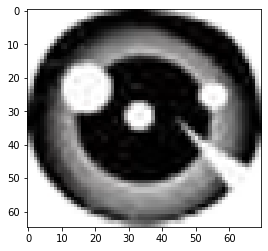

In [6]:
plt.imshow(pupil_img)
plt.show()

# cv2.imshow('pupil', pupil_img)
# cv2.waitKey()
# cv2.destroyAllWindows()

## Template Matching
<ul>
    <li>There are 6 comparison methods</li>
    <ul>
        <li>TM_CCOEFF</li>
        <li>TM_CCOEFF_NORMED</li>
        <li>TM_CCORR</li>
        <li>TM_CCORR_NORMED</li>
        <li>TM_SQDIFF</li>
        <li>TM_SQDIFF_NORMED</li>
    </ul>
    <li><a href="https://docs.opencv.org/master/d4/dc6/tutorial_py_template_matching.html">OpenCV Template Matching Docs</a></li>
</ul>

In [7]:
# There are 6 comparison methods to choose from:
# TM_CCOEFF, TM_CCOEFF_NORMED, TM_CCORR, TM_CCORR_NORMED, TM_SQDIFF, TM_SQDIFF_NORMED
# You can see the differences at a glance here:
# https://docs.opencv.org/master/d4/dc6/tutorial_py_template_matching.html
result = cv2.matchTemplate(eyes_img, pupil_img, cv2.TM_CCOEFF_NORMED)

### View Result

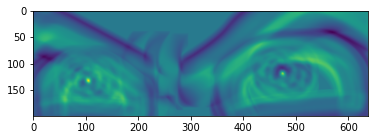

In [8]:
plt.imshow(result)
plt.show()


# cv2.imshow('Result', result)
# cv2.waitKey()
# cv2.destroyAllWindows()

### Get Max Result

In [9]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

In [10]:
max_loc

(105, 132)

In [11]:
max_val

0.5314282178878784

### Paint Square on Main Image

In [12]:
w = pupil_img.shape[1]
h = pupil_img.shape[0]

In [13]:
cv2.rectangle(eyes_img, max_loc, (max_loc[0] + w, max_loc[1] + h), (0,255,255), 2)

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

## Paint Multiple Squares

In [14]:
threshold = .40

In [15]:
yloc, xloc = np.where(result >= threshold)

In [16]:
len(xloc)

16

In [17]:
for (x, y) in zip(xloc, yloc):
    cv2.rectangle(eyes_img, (x, y), (x + w, y + h), (50,200,200), 2)

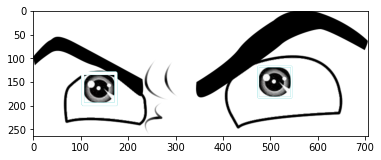

In [18]:
plt.imshow(eyes_img)
plt.show()

# cv2.imshow('eyes', eyes_img)
# cv2.waitKey()
# cv2.destroyAllWindows()

In [19]:
# What is a rectangle?
# x, y, w, h
rectangles = []
for (x, y) in zip(xloc, yloc):
    rectangles.append([int(x), int(y), int(w), int(h)])
    rectangles.append([int(x), int(y), int(w), int(h)])

In [20]:
len(rectangles)

32

In [21]:
rectangles, weights = cv2.groupRectangles(rectangles, 1, 0.2)

In [22]:
rectangles

array([[475, 118,  70,  65],
       [105, 132,  70,  65]])

In [23]:
#you should see a list of rectangles equal to the number of eyes in the image ie 2
len(rectangles)

2